In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("S:\\ML\\Datasets\\loan_data_set.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Checking missing values and cleaning data

In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df["Gender"]=df["Gender"].fillna("Unknown")
df["Married"]=df["Married"].fillna("Not Specified") 

In [6]:
df["Dependents"]=df["Dependents"].fillna("0")
df["Self_Employed"]=df["Self_Employed"].fillna("No")
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["LoanAmount"].mode()[0])
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [7]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Labeling the data

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[["Gender","Married","Self_Employed","Education","Property_Area","Loan_Status","Loan_ID"]]=df[["Gender","Married","Self_Employed","Education","Property_Area","Loan_Status","Loan_ID"]].apply(le.fit_transform)
df[["Gender","Married","Self_Employed","Education","Property_Area","Loan_Status","Loan_ID"]]

,Gender,Married,Self_Employed,Education,Property_Area,Loan_Status,Loan_ID
0,1,0,0,0,2,1,0
1,1,2,0,0,0,0,1
2,1,2,1,0,2,1,2
3,1,2,0,1,2,1,3
4,1,0,0,0,2,1,4
...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,609
610,1,2,0,0,0,1,610
611,1,2,0,0,2,1,611
612,1,2,0,0,2,1,612


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.7+ KB


In [17]:
df["Dependents"]=df["Dependents"].replace("3+",3).astype(int)
df 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,2,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,2,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,2,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,2,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,2,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,2,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB


<AxesSubplot:>

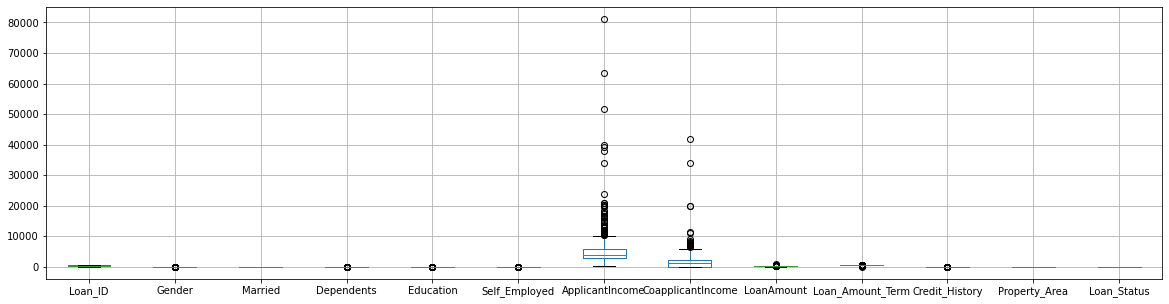

In [19]:
df.boxplot(figsize=(20,5))

### MinMaxScaler

In [20]:
mm=MinMaxScaler()
mdf=mm.fit_transform(df)
mdf=pd.DataFrame(mdf,columns=df.columns)
mdf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.000000,0.5,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.743590,1.0,1.0,1.0
1,0.001631,0.5,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0,0.0
2,0.003263,0.5,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0,1.0
3,0.004894,0.5,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0,1.0
4,0.006525,0.5,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.993475,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0,1.0
610,0.995106,0.5,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0,1.0
611,0.996737,0.5,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0,1.0
612,0.998369,0.5,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0,1.0


<AxesSubplot:>

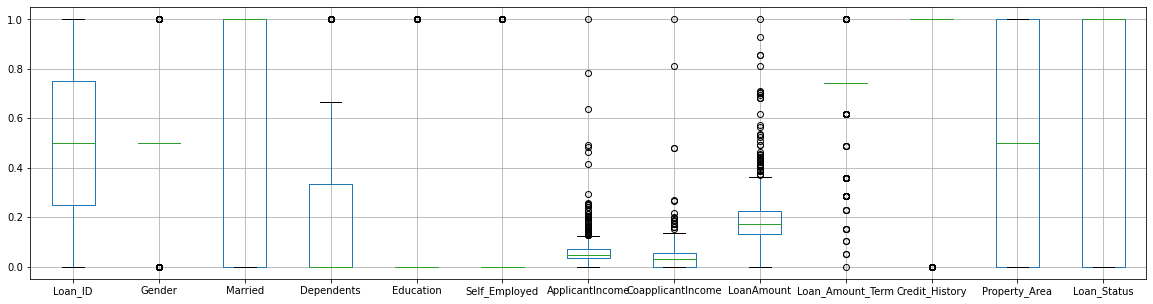

In [21]:
mdf.boxplot(figsize=(20,5))

## Standard Scaler

In [22]:
sc=StandardScaler()
scaled_data=sc.fit_transform(df)
scaled_data=pd.DataFrame(scaled_data,columns=df.columns)
scaled_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,-1.729232,0.382616,-1.368405,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.317964,0.411733,1.223298,0.674519
1,-1.723590,0.382616,0.734726,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.317964,0.411733,-1.318513,-1.482537
2,-1.717948,0.382616,0.734726,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.317964,0.411733,1.223298,0.674519
3,-1.712307,0.382616,0.734726,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.317964,0.411733,1.223298,0.674519
4,-1.706665,0.382616,-1.368405,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.317964,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,-1.990376,-1.368405,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.898095,0.317964,0.411733,-1.318513,0.674519
610,1.712307,0.382616,0.734726,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.267279,-2.230315,0.411733,-1.318513,0.674519
611,1.717948,0.382616,0.734726,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.269371,0.317964,0.411733,1.223298,0.674519
612,1.723590,0.382616,0.734726,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.483367,0.317964,0.411733,1.223298,0.674519


In [23]:
scaled_data.mean()

Loan_ID             -5.316052e-17
Gender               1.706923e-16
Married              4.158816e-17
Dependents          -1.766593e-16
Education            1.121072e-17
Self_Employed       -1.338054e-16
ApplicantIncome     -2.694189e-17
CoapplicantIncome   -3.977998e-18
LoanAmount           1.952835e-17
Loan_Amount_Term     3.046785e-16
Credit_History       8.317632e-17
Property_Area       -3.550702e-16
Loan_Status          4.882088e-17
dtype: float64

In [24]:
scaled_data.std()

Loan_ID              1.000815
Gender               1.000815
Married              1.000815
Dependents           1.000815
Education            1.000815
Self_Employed        1.000815
ApplicantIncome      1.000815
CoapplicantIncome    1.000815
LoanAmount           1.000815
Loan_Amount_Term     1.000815
Credit_History       1.000815
Property_Area        1.000815
Loan_Status          1.000815
dtype: float64